In [ ]:
# Start writing code here...import numpy as np
from math import sqrt, pi
import pybinding as pb
from pybinding.repository import graphene
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# seaborn setting
sns.set(style="ticks")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [ ]:
def gate(r0, v1, v2):
    @pb.onsite_energy_modifier
    def potential(energy, x,y):
        energy[(x**2+y**2) < r0] += v1
        energy[(x**2+y**2) > r0] += v2
        return energy
    return potential

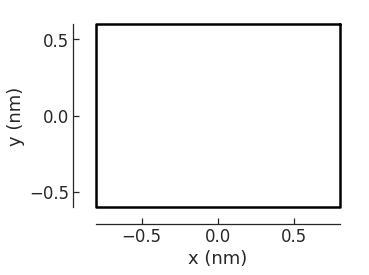

In [ ]:
def rectangle(width, height):
    x0 = width / 2
    y0 = height / 2
    return pb.Polygon([[x0, y0], [x0, -y0], [-x0, -y0], [-x0, y0]])

shape = rectangle(1.6, 1.2)
shape.plot()

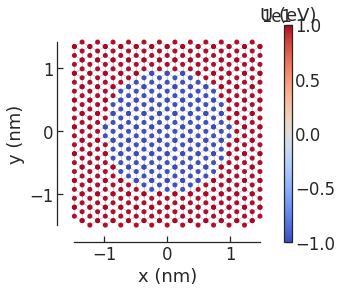

In [ ]:
model = pb.Model(
    graphene.bilayer(),
    rectangle(width=3, height=3),
    gate(1., -10, 10)
)
model.onsite_map.plot(cmap="coolwarm", site_radius=0.03)
pb.pltutils.colorbar(label="U (eV)")

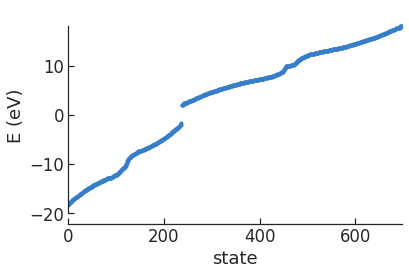

In [ ]:
solver = pb.solver.lapack(model)
eigenvalues = solver.calc_eigenvalues()
eigenvalues.plot()
plt.ylim(-48.5,-45)
#plt.xlim(0,50)


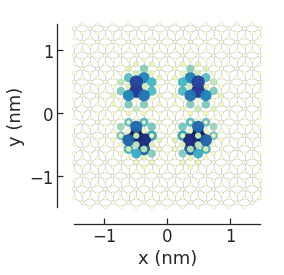

In [ ]:
probability_map = solver.calc_probability(6)
probability_map.plot(site_radius=(0.03, 0.12))

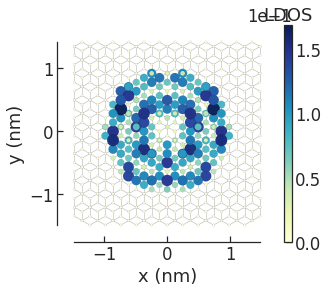

In [ ]:
ldos = solver.calc_spatial_ldos(energy=-15., broadening=0.05)  # eV
ldos.plot(site_radius=(0.02, 0.1))
pb.pltutils.colorbar(label="LDOS")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=11f8f786-6203-4de6-8231-304550289e5e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>